# Behavioral Risk Factor Surveillance System (BRFSS) Health Modeling
This project explores and analyzes data from the Behavioral Risk Factor Surveillance System (BRFSS) 2021, using various regression techniques in R. The goal is to uncover relationships between behavioral risk factors and health outcomes across the U.S. adult population. These data come from the [Centers for Disease Control](www.cdc.gov).

The following analysis includes exploratory data analysis, model fitting, diagnostics, and interpretation of findings.


------------------------------------------------------------------------

### Packages
The installed packages are:
- `tidyverse`
- `lm.beta`

In [3]:
library(tidyverse)
library(lm.beta)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


------------------------------------------------------------------------

### Preliminaries

In [13]:
# set the working directory to use the data folder
setwd("/Users/spotts/Projects/brfss-health-modeling/")
# setwd("data/")

In [14]:
# load the data file
brf <- read_csv("data/brfss2021.csv", show_col_types = FALSE)
head(brf)


_STATE,IMONTH,IDAY,IYEAR,DISPCODE,PVTRESD1,COLGHOUS,NUMADULT,NUMMEN,NUMWOMEN,⋯,SOFEMALE,TRNSGNDR,QSTVER,QSTLANG,_METSTAT,_URBSTAT,MSCODE,_CHISPNC,CAGEG,_AGE_G
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,01,19,2021,1100,1,NA,2,1,1,⋯,NA,NA,10,1,1,1,1,9,NA,6
1,01,21,2021,1100,1,NA,2,1,1,⋯,NA,NA,10,1,1,1,2,9,NA,6
1,01,21,2021,1100,1,NA,2,1,1,⋯,NA,NA,10,1,1,1,1,9,NA,6
1,01,17,2021,1100,1,NA,2,1,1,⋯,NA,NA,10,1,1,1,3,9,NA,5
1,01,15,2021,1100,1,NA,2,1,1,⋯,NA,NA,10,1,2,1,2,9,NA,6
1,01,14,2021,1100,1,NA,1,NA,NA,⋯,NA,NA,10,1,2,2,5,9,NA,6


------------------------------------------------------------------------

## Analysis 

------------------------------------------------------------------------

### Key Variables Considered
For this study, I am looking at employment status, whether or not a respondent is an e-cigarette smoker, whether or not they received the flu shot, and the score of how many negative mental health days they experience within the last 30 days.

The goal is to see whether the respondents answers to the flu shot, e-cigarette use and employment status are predictors of mental health, and if so, which factors are the strongest.

In [6]:

# viewing the stucture of the dataset
str(brf)

# MENTHLTH
# FLUSHOT7
# ECIGNOW1
# EMPLOY1

# checking out summary statistics per variable
summary(brf$MENTHLTH)
summary(brf$FLUSHOT7)
summary(brf$ECIGNOW1)
summary(brf$EMPLOY1)

# selecting a subset of the data for the variables in question
brf |>
  select(MENTHLTH, FLUSHOT7, ECIGNOW1, EMPLOY1) |>
  head(10)


spc_tbl_ [438,693 × 209] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ _STATE  : num [1:438693] 1 1 1 1 1 1 1 1 1 1 ...
 $ IMONTH  : chr [1:438693] "01" "01" "01" "01" ...
 $ IDAY    : chr [1:438693] "19" "21" "21" "17" ...
 $ IYEAR   : num [1:438693] 2021 2021 2021 2021 2021 ...
 $ DISPCODE: num [1:438693] 1100 1100 1100 1100 1100 1100 1100 1100 1100 1100 ...
 $ PVTRESD1: num [1:438693] 1 1 1 1 1 1 1 1 1 1 ...
 $ COLGHOUS: logi [1:438693] NA NA NA NA NA NA ...
 $ NUMADULT: num [1:438693] 2 2 2 2 2 1 2 1 1 2 ...
 $ NUMMEN  : num [1:438693] 1 1 1 1 1 NA 1 NA NA 1 ...
 $ NUMWOMEN: num [1:438693] 1 1 1 1 1 NA 1 NA NA 1 ...
 $ RESPSLCT: num [1:438693] 2 2 2 2 1 NA 1 NA NA 2 ...
 $ PVTRESD3: num [1:438693] NA NA NA NA NA NA NA NA NA NA ...
 $ CCLGHOUS: num [1:438693] NA NA NA NA NA NA NA NA NA NA ...
 $ LANDLINE: num [1:438693] NA NA NA NA NA NA NA NA NA NA ...
 $ HHADULT : num [1:438693] NA NA NA NA NA NA NA NA NA NA ...
 $ SEXVAR  : num [1:438693] 2 2 2 2 1 1 1 1 2 2 ...
 $ GENHLTH : num [1:

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   1.00   15.00   88.00   59.92   88.00   99.00       2 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  1.000   1.000   1.000   1.536   2.000   9.000   27648 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  1.000   3.000   3.000   3.146   3.000   9.000   23025 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  1.000   1.000   2.000   3.804   7.000   9.000    3588 

MENTHLTH,FLUSHOT7,ECIGNOW1,EMPLOY1
<dbl>,<dbl>,<dbl>,<dbl>
10,1,3,7
88,2,3,8
88,2,3,7
10,1,3,7
88,1,3,8
88,1,3,7
88,1,3,8
88,1,3,2
88,1,3,7


### Variable Overview 

#### MENTHLTH
`MENTHLTH` is a discrete variable allowing values for 1-30 along with a few out of range values that indicate the respondent didn't answer, doesn't know, or has not experienced poor mental health in the last 30 days.

**Definition:** How many days during the past 30 days the respondent's mental health was not good  
**Levels:** 
- 1-30. number of days the responent's mental health was not good within the last 30 days
- 88. None (if the responent responded "none" or "never"), represents 0
- 77. Don't know/ Not sure
- 99. Refused to answer

#### FLUSHOT7
`FLUSHOT7` is a categorical variable that describes whether the respondent received the flu shot.

**Definition:** Whether the responent received the flu shot within the last 12 months.  
**Levels:**
- 1. Yes
- 2. No
- 7. Don't know/ Not sure
- 9. Refused to answer


#### ECIGNOW1
`ECIGNOW1` is a categorical variable that shows how often (if at all) the respondent uses e-cigarettes.
**Definition:** If/ how often the respondent uses e-cigarettes now.  
**Levels:**
- 1. Every day
- 2. Some days
- 3. Not at all (given that the question says *now*, this could indicate the respondent has used e-cigs in the past, but currently does not)
- 4. Never used e-cigarettes
- 7. Don't know/ Not sure
- 9. Refused

#### EMPLOY1
`EMPLOY1` is a categorical variable that describes the respondent's employment status.
**Definition:** The category of the respondent's employment status.  
**Levels:**  
- 1. Employed for wages
- 2. Self-employed
- 3. Out of work for 1 year or more
- 4. Out of work for less than 1 year
- 5. Homemaker
- 6. Student
- 7. Retired
- 8. Unable to work
- 9. Refused to answer

### Cleaning and removing outliers and NA values
To improve data quality and ensure analytical integrity, I am cleaning the dataset by addressing missing values and excluding outliers.

In [7]:
# viewing summary statistics for each variable
summary(brf$MENTHLTH)
summary(brf$FLUSHOT7)
summary(brf$ECIGNOW1)
summary(brf$EMPLOY1)

# checking out unique values for each variable
unique(brf$MENTHLTH)
unique(brf$FLUSHOT7)
unique(brf$ECIGNOW1)
unique(brf$EMPLOY1)

################################
# cleaning and removing outliers
################################

### clean the values for MENTHLTH:
# change the 88 values to 0 since they represent none/never
# remove responses that the 77 and 99, indicating they don't know or
# refused to respond, as they won't be helpful in the analysis
brf_clean <- brf |>
  select(MENTHLTH, FLUSHOT7, ECIGNOW1, EMPLOY1) |>
  mutate(
    MENTHLTH = ifelse(MENTHLTH == 88, 0, MENTHLTH)
  ) |>
  filter(MENTHLTH <= 30 | is.na(MENTHLTH)) # include NAs

# validating the max looks appropriate
summary(brf_clean$MENTHLTH)

### clean values for FLUSHOT7:
# remove the values that represent "don't know" or "refused to answer" from FLUSHOT7 and EMPLOY1
# change values 1 (yes) and 2 (no) into boolean values, modifying 2 -> 0
brf_clean <- brf_clean |>
  filter(!FLUSHOT7 %in% c(7, 9) & !EMPLOY1 == 9) |>
  mutate(FLUSHOT7 = ifelse(FLUSHOT7 == 2, 0, FLUSHOT7)) # change no's to 0

# validate we just have 0 and 1 for Y/N in FLUSHOT7
unique(brf_clean$FLUSHOT7) # includes NAs

### clean values for ECIGNOW1
# there are two response categories that could be different based on the respondent's interpretation of 'now', but both indicate the respondent does not use
# e-cigarettes daily or sometimes, so my inclination is to make two categories indicating whether they are a current user or not
# it also makes sense to remove the responses where the respondent refused to answer or did not know
brf_clean <- brf_clean |>
  filter(!ECIGNOW1 %in% c(7, 9)) |> # filtering out 'not sure' and 'refused'
  mutate(
    ECIGNOW1 = case_when(
      ECIGNOW1 %in% c(1, 2) ~ 1,  # current users == 1
      ECIGNOW1 %in% c(3, 4) ~ 0 # not current users == 0
    )
  )

# validate the values are 0 and 1 for whether respondent is a current e-cig user
unique(brf_clean$ECIGNOW1) # includes NAs

### removing 'refused' for EMPLOY1
brf_clean <- brf_clean |>
  filter(!EMPLOY1 == 9) |>
  mutate(
    EMPLOY1 = case_when(
      EMPLOY1 == 1 ~ "Employed",
      EMPLOY1 == 2 ~ "Self-employed",
      EMPLOY1 == 3 ~ "Unemployed +1 yr",
      EMPLOY1 == 4 ~ "Unemployed -1 yr",
      EMPLOY1 == 5 ~ "Homemaker",
      EMPLOY1 == 6 ~ "Student",
      EMPLOY1 == 7 ~ "Retired",
      EMPLOY1 == 8 ~ "Unable to work"
    )
  )

########################
# imputing/ handling NAs
########################
# there are only 2 NA values for MENTHLTH, but can impute with the median since it's a discrete variable
MENTHLTH_median <- median(brf_clean$MENTHLTH, na.rm = TRUE)
MENTHLTH_median

sum(is.na(brf_clean$FLUSHOT7)) / nrow(brf_clean) # 0.05
sum(is.na(brf_clean$ECIGNOW1)) / nrow(brf_clean) # 0.04

sum(is.na(brf_clean$EMPLOY1)) / nrow(brf_clean) # 0.00

brf_clean <- brf_clean |>
  mutate(
    MENTHLTH = ifelse(is.na(MENTHLTH), MENTHLTH_median, MENTHLTH),
    EMPLOY1 = factor(EMPLOY1) # needs to be a factor to be used properly for visualizations
  ) |>
  filter(!is.na(FLUSHOT7) & !is.na(ECIGNOW1)) |>
  rename(
    FLUSHOT = FLUSHOT7,
    ECIGUSER = ECIGNOW1,
    EMPLOY = EMPLOY1
  ) # renaming the variables so they are more readable

# preview
head(brf_clean, 10)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   1.00   15.00   88.00   59.92   88.00   99.00       2 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  1.000   1.000   1.000   1.536   2.000   9.000   27648 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  1.000   3.000   3.000   3.146   3.000   9.000   23025 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  1.000   1.000   2.000   3.804   7.000   9.000    3588 

[1] 10 88  5 25 15 77 14  2  3  7  1 30 20  8  4 NA 99 21 28 24  6 12 22 27  9
[26] 18 13 17 16 19 29 11 23 26

[1]  1  2 NA  7  9

[1]  3 NA  4  1  2  9  7

[1]  7  8  2  5  1  6  4 NA  3  9

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.000   0.000   4.104   4.000  30.000       2 

[1]  1  0 NA

[1]  0  1 NA

[1] 0

[1] 0.05392235

[1] 0.04347038

[1] 0

MENTHLTH,FLUSHOT,ECIGUSER,EMPLOY
<dbl>,<dbl>,<dbl>,<fct>
10,1,0,Retired
0,0,0,Unable to work
0,0,0,Retired
10,1,0,Retired
0,1,0,Unable to work
0,1,0,Retired
0,1,0,Unable to work
0,1,0,Self-employed
0,1,0,Retired


#### Explanation of the data cleansing changes
In the code block above, I start by cleaning the data and removing any outliers. I chose to do this step by step for each variable to make 
it easier to explain what was happening in each step, but this could have been done all at once. For the categorical variable that had 
binary outcomes, I chose to convert those fields (`FLUSHOT7` and `ECIGNOW1`) into boolean values to indicate `TRUE` or `FALSE`. I also
chose to filter out the responses where the responent chose "Don't know" or "Refused" as outliers, since these values to do provide much
value in the analysis.

After cleaning and removing outliers, I imputed and handled NA values that occurred in the data. Since `MENTHLTH` is a discrete numeric 
variable, I calculated the `median()` and imputed that value for the 2 records that were missing `MENTHLTH`. Since the other variables in 
the data set are categorical it didn't make sense to impute them this same way. I looked at the unique values for `EMPLOY1` and saw that
there are no NA values in the dataset, so there was nothing to be done here. The other variables however, `FLUSHOT7` and `ECIGNOW1` both 
contained NAs. I looked the the percentage of missing values out of the total and saw they accounted for 0.05% and 0.04% respectively, so 
given that these are small percentages of the total dataset, I decided to omit them.

I also included a `rename()` statement to make the variable names easier to work with. 

### Exploratory Analysis with ggplot2 visualizations 

#### Employment Category vs Mental Health
This visualization shows boxplots for poor mental health days within the last 30 days for each different employment
category. The lower median values (the dark line in the box), indicate that people who are employed in the categories "Employed", 
"Homemakers", "Self-Employed", and "Retired" experience fewer poor mental health days than people whose employment category falls under 
"Student", "Unable to Work", "Unemployed +1 yr" or "Unemployed -1 yr". This also relates to the outliers seen in the categories "Employed", 
"Homemakers", "Self-Employed", and "Retired", which make sense since the majority of the number of poor mental health days in those categories
is low.

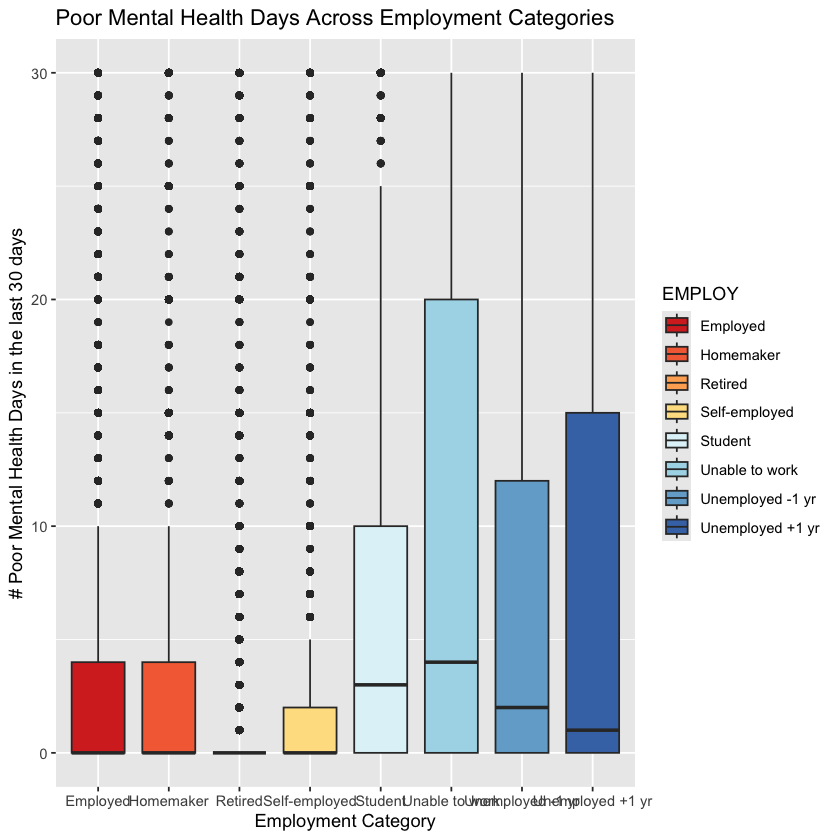

In [15]:
ggplot(data = brf_clean, aes(x = EMPLOY, y = MENTHLTH, fill = EMPLOY)) +
  geom_boxplot() +
  labs(
    title = "Poor Mental Health Days Across Employment Categories",
    x = "Employment Category",
    y = "# Poor Mental Health Days in the last 30 days"
  ) + scale_fill_brewer(palette = "RdYlBu")

# save plot
ggsave("figures/employment_v_mental_health.png", width = 18, height = 6)

#### e-Cigarette Use vs Mental Health
This visualization is a boxplot that shows poor mental health days within the last 30 days for people who are and are not current e-cigarette
smokers. Non e-cigarette smokers have a lower median number of bad mental health days and their smaller IQR boxes indicate there's less 
variability for the number of bad mental health days e-cigarette smokers experience. This visualization indicates e-cigarette smokers
experience more poor mental health days and there is much more variability within that group.

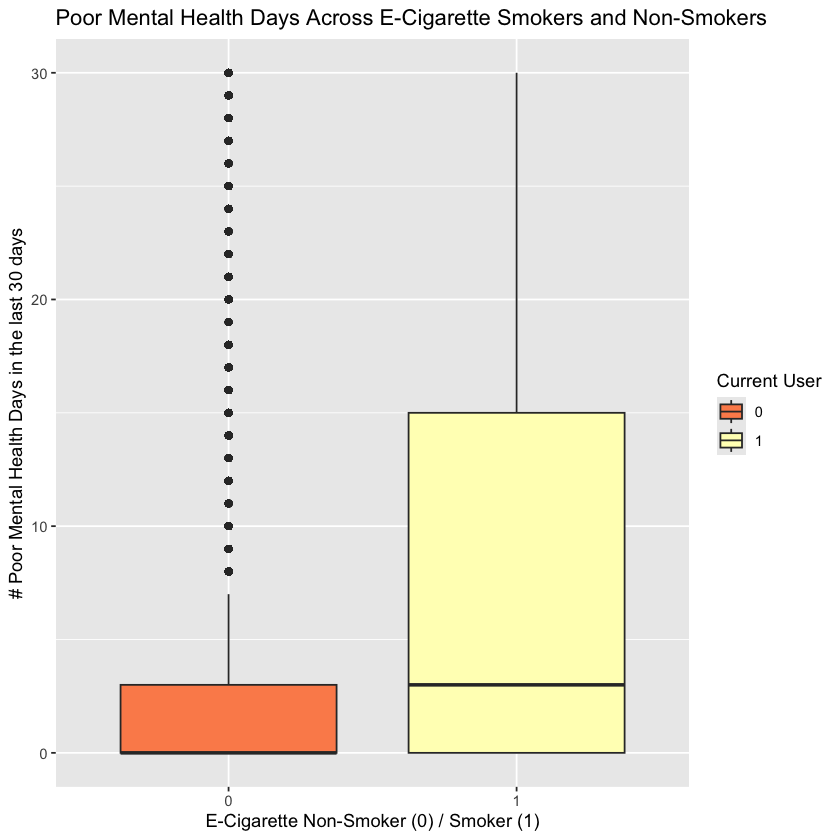

In [21]:
# relationship between e-cigarette users/ non-users and # poor mental health days in the last 30 days
ggplot(data = brf_clean, aes(x = factor(ECIGUSER), y = MENTHLTH, fill = factor(ECIGUSER))) +
  geom_boxplot() +
  labs(
    title = "Poor Mental Health Days Across E-Cigarette Smokers and Non-Smokers",
    x = "E-Cigarette Non-Smoker (0) / Smoker (1)",
    y = "# Poor Mental Health Days in the last 30 days",
    fill = "Current User"
  ) + scale_fill_brewer(palette = "RdYlBu")

# save plot
ggsave("figures/ecig_v_mental_health.png", width = 18, height = 6)

#### Flu Shot Received vs Mental Health
This visualization is a boxplot that showing poor mental health days within the last 30 days for groups of respondents who did or did not
receive the flu shot. The two boxplots between respondents who did and did not receive the flu shot are pretty similar, indicating there 
isn't a significant difference between the two groups, but the group who did not receive the flu shot has larger IQR boxes, which shows 
there is more variability within that group in terms of how many poor mental health days they experience.

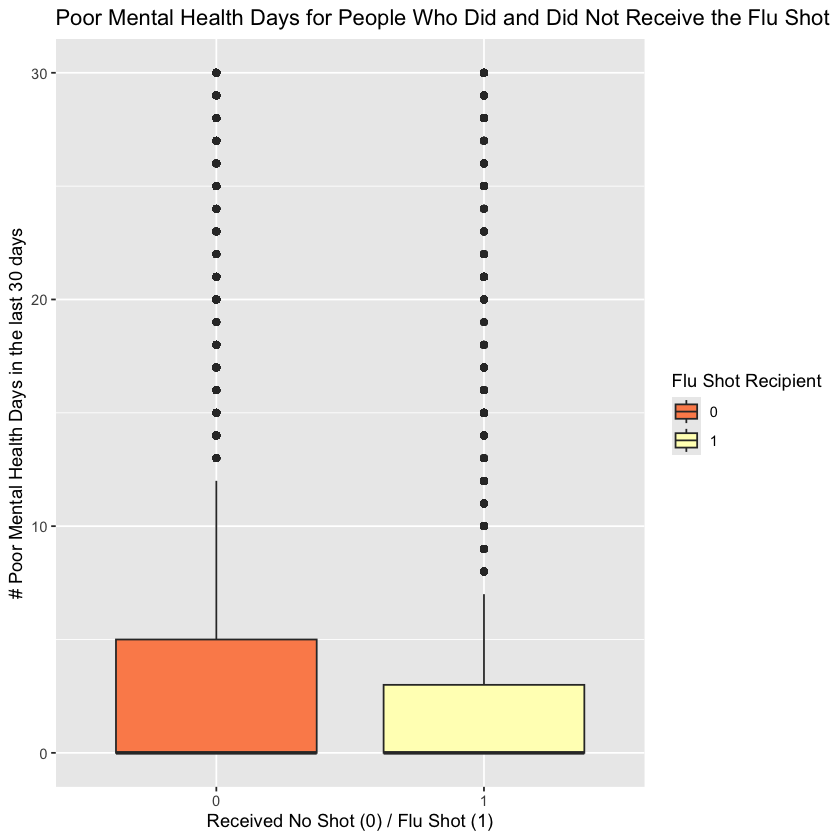

In [22]:
# relationship between flu shot received or not and poor mental health days in the last 30 days
ggplot(data = brf_clean, aes(x = factor(FLUSHOT), y = MENTHLTH, fill = factor(FLUSHOT))) +
  geom_boxplot() +
  labs(
    title = "Poor Mental Health Days for People Who Did and Did Not Receive the Flu Shot",
    x = "Received No Shot (0) / Flu Shot (1)",
    y = "# Poor Mental Health Days in the last 30 days",
    fill = "Flu Shot Recipient"
  )  + scale_fill_brewer(palette = "RdYlBu")

# save plot
ggsave("figures/flushot_v_mental_health.png", width = 18, height = 6)

### Descriptive Statistics
For gathering summary statistics for `MENTHLTH`, I used the `summary()` function to look at the quartiles, median, mean, min and max. The min and max values are as expected and represent the full range of values: i.e. the respondents could have at minimum had 0 poor mental health days and at most all 30 days. The more interesting difference is with the median and the mean. The median of 0 and the mean of 4.124 indicate that the data are right skewed and half of the respondents said they did not experience any poor mental health days within the last 30 days. The mean of 4.124 tells us there are respondents who answered with rather high numbers, which skews the results farther to the right.

The other variables are categorical, so for those I chose to create a `table()` to see the proportions of the values across each category. 
Based on those proportions, we can see that slightly more people received the flu shot than not, and the amount of respondents who are not 
current e-cigarette users is more than 1 order of magnitude greater than the respondents who are current e-cigarette users. For the `EMPLOY` 
category, the "Employed" and "Retired" groups are the largest categories, with "Students" and the Unemployed groups making up the smallest 
portion of respondents. 

In [ ]:
# view the structure of the dataset
str(brf_clean)

# summary stats: MENTHLTH
summary(brf_clean$MENTHLTH)
#    Min. 1st Qu.  Median    Mean 3rd Qu.    Max.
#  0.000   0.000   0.000   4.124   4.000  30.000

# summary stats: FLUSHOT
table(brf_clean$FLUSHOT)
#     0      1
# 189318 207236

# summary stats: ECIGUSER
table(brf_clean$ECIGUSER)
#      0      1
# 378120  18434

# summary stats: EMPLOY
table(brf_clean$EMPLOY)
#         Employed        Homemaker          Retired    Self-employed
#          171511            16183           122059            34518
#         Student   Unable to work Unemployed -1 yr Unemployed +1 yr
#            9859            23266             8846            10312

tibble [396,554 × 4] (S3: tbl_df/tbl/data.frame)
 $ MENTHLTH: num [1:396554] 10 0 0 10 0 0 0 0 0 5 ...
 $ FLUSHOT : num [1:396554] 1 0 0 1 1 1 1 1 1 0 ...
 $ ECIGUSER: num [1:396554] 0 0 0 0 0 0 0 0 0 0 ...
 $ EMPLOY  : Factor w/ 8 levels "Employed","Homemaker",..: 3 6 3 3 6 3 6 4 3 3 ...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   4.124   4.000  30.000 


     0      1 
189318 207236 


     0      1 
378120  18434 


        Employed        Homemaker          Retired    Self-employed 
          171511            16183           122059            34518 
         Student   Unable to work Unemployed -1 yr Unemployed +1 yr 
            9859            23266             8846            10312 

### Regressions
This section is using linear regressions to predict mental health outcomes for different combinations of predictors. It is then identifying the best model using the `AIC()` score calculated, which helps determine the best model fit based on the lowest score.

In [ ]:
# 1. linear regression predicting MENTHLTH from EMPLOY + ECIGUSER + FLUSHOT
model_all <- lm(MENTHLTH ~ EMPLOY + ECIGUSER + FLUSHOT, brf_clean)
summary(model_all)
lm.beta(model_all)

# 2. linear regression predicting MENTHLTH from EMPLOY + ECIGUSER
model_emp_ecig <- lm(MENTHLTH ~ EMPLOY + ECIGUSER, brf_clean)
lm.beta(model_emp_ecig)

# which is a better fit?
AIC(model_all)
AIC(model_emp_ecig)


Call:
lm(formula = MENTHLTH ~ EMPLOY + ECIGUSER + FLUSHOT, data = brf_clean)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.4031  -3.5688  -2.7620  -0.4061  27.5939 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)             3.92468    0.02289 171.482  < 2e-16 ***
EMPLOYHomemaker         0.34122    0.06472   5.272 1.35e-07 ***
EMPLOYRetired          -1.16263    0.03017 -38.535  < 2e-16 ***
EMPLOYSelf-employed    -0.78394    0.04648 -16.866  < 2e-16 ***
EMPLOYStudent           2.74020    0.08157  33.595  < 2e-16 ***
EMPLOYUnable to work    6.54987    0.05497 119.153  < 2e-16 ***
EMPLOYUnemployed -1 yr  3.13406    0.08589  36.490  < 2e-16 ***
EMPLOYUnemployed +1 yr  3.55980    0.07982  44.600  < 2e-16 ***
ECIGUSER                3.92859    0.05995  65.533  < 2e-16 ***
FLUSHOT                -0.35590    0.02584 -13.774  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.868 


Call:
lm(formula = MENTHLTH ~ EMPLOY + ECIGUSER + FLUSHOT, data = brf_clean)

Standardized Coefficients::
           (Intercept)        EMPLOYHomemaker          EMPLOYRetired 
                    NA            0.008269824           -0.065738099 
   EMPLOYSelf-employed          EMPLOYStudent   EMPLOYUnable to work 
          -0.027070933            0.052264308            0.188555140 
EMPLOYUnemployed -1 yr EMPLOYUnemployed +1 yr               ECIGUSER 
           0.056696471            0.069398358            0.101317470 
               FLUSHOT 
          -0.021775981 



Call:
lm(formula = MENTHLTH ~ EMPLOY + ECIGUSER, data = brf_clean)

Standardized Coefficients::
           (Intercept)        EMPLOYHomemaker          EMPLOYRetired 
                    NA            0.008381302           -0.070277426 
   EMPLOYSelf-employed          EMPLOYStudent   EMPLOYUnable to work 
          -0.025956649            0.052530410            0.188361471 
EMPLOYUnemployed -1 yr EMPLOYUnemployed +1 yr               ECIGUSER 
           0.057506151            0.070058457            0.102688563 


[1] 2761372

[1] 2761560

#### Interpreting the Linear Regression Results
**1.  linear regression predicting MENTHLTH from EMPLOY + ECIGUSER + FLUSHOT**  
For the first linear regression, I am using `EMPLOY`, `ECIGUSER`, and `FLUSHOT` to predict a respondent's `MENTHLTH`. After creating the 
linear model, I use `lm.beta()` to standardize the regression coefficients, so that all the variables are evaluated on the same scale. 
Based on the standardized regression coefficients, it's clear that being unable to work (`EMPLOY` == 'Unable to work') and being a current 
e-cigarette users, are the strongest predictors of poor mental health out of the different predictors in the regression. It also shows a 
slightly better mental health for respondents who are retired, self-employed, and received the flu shot.

**2. linear regression predicting MENTHLTH from EMPLOY + ECIGUSER**  
Since the data from the first regression showed that whether the respondent received the flu shot only had a slight impact on their mental 
health, I removed it from the regression to see how `MENTHLTH` would be impacted. This did not appear to make a significant difference in 
the standardized regression coefficients.

**Better fit**  
When comparing the `AIC()` values between the two linear regression models, they're actually quite close, but the first linear regression 
model which uses all 3 variables (`EMPLOY`, `ECIGUSER`, and `FLUSHOT`) as predictors of `MENTHLTH`, appears to be the stronger model of the 
two, with an AIC of 2761372 as opposed to 2765961 in the second linear regression.


------------------------------------------------------------------------

## Summary of Findings

This project demonstrated how multiple regression techniques can be used to explore complex relationships among variables in a dataset. More specifically- how e-cigarette usage, receiving the flu shot, and employment status can influence mental health outcomes.

### Key Takeaways from the Regression Analysis
#### Strongest Predictors of Poor Mental Health:
Being unable to work and being a current e-cigarette user emerged as the strongest predictors of poor mental health (`MENTHLTH`). These variables showed the highest standardized beta coefficients, indicating a stronger association with increased reported mental health issues.

#### Positive Associations with Better Mental Health:
Respondents who were retired, self-employed, or had received a flu shot reported slightly better mental health outcomes. However, these effects were relatively modest compared to the impact of employment status and e-cigarette use.

#### Limited Impact of Flu Shot Variable:
Removing the `FLUSHOT` variable from the model did not significantly alter the standardized coefficients of the remaining predictors, suggesting that flu shot status has a limited influence on mental health when controlling for employment and e-cigarette use.

#### Model Fit Comparison (AIC): 
Although the difference is not dramatic, the model including all three predictors (`EMPLOY`, `ECIGUSER`, and `FLUSHOT`) had a slightly better fit based on the AIC (2761372 vs. 2765961). This suggests that retaining the flu shot variable, while not strongly impactful on its own, slightly improves the overall explanatory power of the model.

### Further Analysis
For further analysis, it could be valuable to explore potential interaction effects between predictors. For example, whether the relationship between e-cigarette use and mental health varies depending on employment status. This could uncover more nuanced patterns in the data. Additionally, running subset analyses across demographic groups (e.g., age, gender, or income) may reveal that certain predictors are more or less influential depending on the population. Finally, converting mental health into a binary outcome (e.g., frequent poor mental health vs. not) would allow for a logistic regression approach, which could offer a different perspective on risk factors associated with poorer mental health outcomes.